In [1]:
import pandas as pd
import numpy as np
train_df=pd.read_csv('../input/contradictory-my-dear-watson/train.csv')
test_df=pd.read_csv('../input/contradictory-my-dear-watson/test.csv')
sub_df=pd.read_csv('../input/contradictory-my-dear-watson/sample_submission.csv')

In [2]:
train_df.head()

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


In [3]:
train_df.shape

(12120, 6)

In [4]:
train_df['hypothesis'][1]

'Practice groups are not permitted to work on these issues.'

In [5]:
train_df['premise'][1]

'These are issues that we wrestle with in practice groups of law firms, she said. '

In [6]:
train_df['language'].value_counts(normalize=True)

English       0.566832
Chinese       0.033911
Arabic        0.033086
French        0.032178
Swahili       0.031766
Urdu          0.031436
Vietnamese    0.031271
Russian       0.031023
Hindi         0.030858
Greek         0.030693
Thai          0.030611
Spanish       0.030198
German        0.028960
Turkish       0.028960
Bulgarian     0.028218
Name: language, dtype: float64

In [7]:
train_df[train_df['language']=='Hindi']

,id,premise,hypothesis,lang_abv,language,label
14,82f24422eb,म्जोडी का दावा है कि वह शादी करने के लिए मोरक्...,मज़ौदी ने दावा किया कि वह योजना के अनुसार योजन...,hi,Hindi,2
48,126018a551,"उसने आश्चर्य से ऊपर देखा, और फिर उसके साथ सोचन...",वो उसके उम्मीद से बहादुर थी।,hi,Hindi,1
84,b02c0e148c,यह संगीत खुदरा विक्रेताओं के लिए कोई रहस्य नही...,संगीत खुदरा विक्रेता पूरी तरह से इस बारे में अ...,hi,Hindi,2
161,ee546513c1,धिक्कार है! शायद आप अपने आप को समझाएंगे? वोवरस...,मैं चाहता हूं कि आप खुद ही समझाएं! मुझे पता है...,hi,Hindi,1
186,6960d6ed8a,vahee baat New York Times ke lie nahin kaha ja...,टाइम्स ने कहा कि बुश को हर किसी से बस झूठ बोल...,hi,Hindi,2
...,...,...,...,...,...,...
11824,7e47d1b52a,यह परम रिपब्लिकन की सबसे बडी हार है,अब कोई दूसरा रिपब्लिकन फालबैक काम नहीं करेगा।,hi,Hindi,1
11853,73ccdc9cc8,"यह ज्यादा सरल किया गया हो ऐसा है, उसने मुझे पह...",उसने मुझे केवल एक संस्करण दिया और यह केवल कुछ ...,hi,Hindi,2
11864,9cb26f1f66,"वह कुछ एक फाइल थी जिसमे कई सरे टैब्स थी , सब ह...",Ye tabs saare accounts ka current balance dikh...,hi,Hindi,1
11882,c33c2e38de,यह साफ नहीं है कि 2010 से पहले की प्रणाली को इ...,सिस्टम को स्थापित करना मुश्किल है क्योंकि हैकर...,hi,Hindi,1


In [8]:
train_df['label'].value_counts()

0    4176
2    4064
1    3880
Name: label, dtype: int64

In [9]:
train_df['premise'][0]

'and these comments were considered in formulating the interim rules.'

In [10]:
train_df['hypothesis'][0]

'The rules developed in the interim were put together with these comments in mind.'

In [11]:
test_df.head()

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian


In [12]:
test_df.shape

(5195, 5)

In [13]:
train_df.isnull().sum()

id            0
premise       0
hypothesis    0
lang_abv      0
language      0
label         0
dtype: int64

In [14]:
train_data = train_df[['premise', 'hypothesis']].values.tolist()
test_data = test_df[['premise', 'hypothesis']].values.tolist()

In [15]:
from transformers import BertTokenizer, TFBertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')
bert = TFBertModel.from_pretrained("bert-base-multilingual-uncased")

2022-07-16 13:07:45.097484: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/999M [00:00<?, ?B/s]

2022-07-16 13:08:50.767161: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-16 13:08:50.770116: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-07-16 13:08:50.824393: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-16 13:08:50.825287: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-07-16 13:08:50.825356: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-07-16 13:08:50.861495: I tensorflow/stream_executor/platform/def

In [16]:
tokenizer('he is fine')

{'input_ids': [101, 10191, 10127, 12922, 102], 'token_type_ids': [0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1]}

In [17]:
train_df['hypothesis'].apply(lambda x: len(x.split())).mean()

9.19529702970297

In [18]:
print('max length of word',max([len(x.split()) for x in train_df['hypothesis']]))

max length of word 46


In [19]:
max_length=90

In [20]:
x_train=tokenizer(
      
    text=train_df[['premise','hypothesis']].values.tolist(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=True,
    return_attention_mask=True,
    verbose=True
    
    )

In [21]:
x_train

{'input_ids': <tf.Tensor: shape=(12120, 90), dtype=int32, numpy=
array([[  101, 10110, 11269, ...,     0,     0,     0],
       [  101, 11269, 10320, ...,     0,     0,     0],
       [  101, 10143, 29761, ...,     0,     0,     0],
       ...,
       [  101, 10103, 12652, ...,     0,     0,     0],
       [  101, 10160, 10103, ...,     0,     0,     0],
       [  101, 10139, 14885, ...,     0,     0,     0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(12120, 90), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(12120, 90), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=in

In [22]:
x_train.input_ids.shape

TensorShape([12120, 90])

In [23]:
import tensorflow as tf
from tensorflow.keras import Model,layers,optimizers,callbacks,losses,metrics,utils
input_ids=layers.Input(shape=(max_length,),dtype=tf.int32,name='input_ids')
token_type_ids=layers.Input(shape=(max_length,),dtype=tf.int32,name='token_type_ids')
attention_mask=layers.Input(shape=(max_length,),dtype=tf.int32,name='attention_mask')

In [24]:
embedding=bert(input_ids,token_type_ids,attention_mask)[1]

In [25]:
embedding

<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'tf_bert_model')>

In [26]:
input_ids

<KerasTensor: shape=(None, 90) dtype=int32 (created by layer 'input_ids')>

In [27]:
out=layers.Dropout(0.15)(embedding)
out=layers.Dense(399,activation='relu')(out)

out=layers.Dropout(0.15)(out)
out=layers.Dense(99,activation='relu')(out)
out=layers.Dense(17,activation='relu')(out)
y=layers.Dense(3,activation='softmax')(out)

nn=Model(inputs=[input_ids,token_type_ids,attention_mask],outputs=y)
nn.layers[3].trainable=True
optimizer=optimizers.Adam(learning_rate = 2e-5)

In [28]:
nn.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 90)]         0                                            
__________________________________________________________________________________________________
token_type_ids (InputLayer)     [(None, 90)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 90)]         0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 167356416   input_ids[0][0]                  
                                                                 token_type_ids[0][0]         

In [29]:
y_train=train_df['label']
y_train

0        0
1        2
2        0
3        0
4        1
        ..
12115    2
12116    0
12117    2
12118    2
12119    0
Name: label, Length: 12120, dtype: int64

In [30]:
y_train.value_counts()

0    4176
2    4064
1    3880
Name: label, dtype: int64

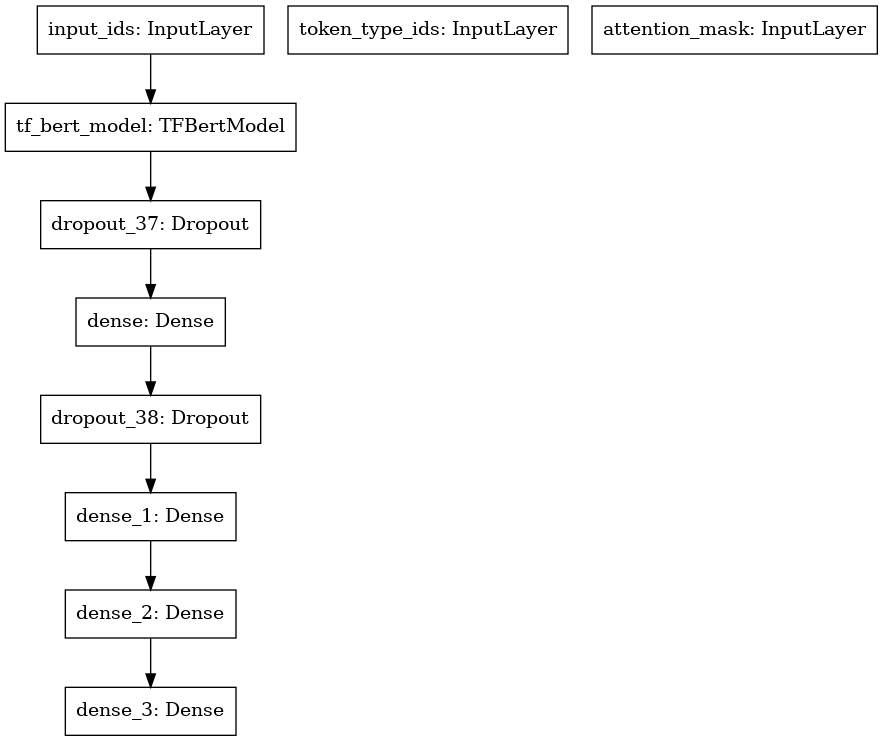

In [31]:
utils.plot_model(nn)

In [32]:
nn.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
nn.fit(

    x={'input_ids':x_train['input_ids'],'token_type_ids':x_train['token_type_ids'],'attention_mask':x_train['attention_mask']},
    y=y_train,
    validation_split=0.25,
    epochs=5,
    batch_size=45

)

2022-07-16 13:09:21.616990: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-07-16 13:09:21.625379: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000200000 Hz


Epoch 1/5
202/202 [==============================] - 114s 520ms/step - loss: 1.0986 - accuracy: 0.3502 - val_loss: 1.0393 - val_accuracy: 0.4587
Epoch 2/5
202/202 [==============================] - 103s 508ms/step - loss: 1.0135 - accuracy: 0.4817 - val_loss: 0.9978 - val_accuracy: 0.5125
Epoch 3/5
202/202 [==============================] - 102s 508ms/step - loss: 0.9214 - accuracy: 0.5598 - val_loss: 1.0249 - val_accuracy: 0.4908
Epoch 4/5
202/202 [==============================] - 102s 507ms/step - loss: 0.8071 - accuracy: 0.6456 - val_loss: 1.1044 - val_accuracy: 0.4987
Epoch 5/5
202/202 [==============================] - 102s 507ms/step - loss: 0.6537 - accuracy: 0.7257 - val_loss: 1.2159 - val_accuracy: 0.5003


# Working with test data

In [33]:
test_df.head()

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian


In [34]:
test_df=test_df.drop(columns=['id','lang_abv','language'],axis=1)
test_df.head()

,premise,hypothesis
0,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی..."
1,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...
2,et cela est en grande partie dû au fait que le...,Les mères se droguent.
3,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。
4,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась."


In [35]:
x_test=tokenizer(

    text=test_df[['premise','hypothesis']].values.tolist(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=True,
    return_attention_mask=True,
    verbose=True


)

In [36]:
x_test

{'input_ids': <tf.Tensor: shape=(5195, 90), dtype=int32, numpy=
array([[  101,   452, 28821, ..., 18055,   119,   102],
       [  101, 13812, 12153, ...,     0,     0,     0],
       [  101, 10137, 17779, ...,     0,     0,     0],
       ...,
       [  101,  3018,  6017, ...,     0,     0,     0],
       [  101, 65148,   112, ...,     0,     0,     0],
       [  101, 10104, 14001, ...,     0,     0,     0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(5195, 90), dtype=int32, numpy=
array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(5195, 90), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32

In [37]:
predicted=nn.predict({'input_ids':x_test['input_ids'],'token_type_ids':x_test['token_type_ids'],'attention_mask':x_test['attention_mask']})

In [38]:
predicted

array([[0.01498939, 0.0044905 , 0.98052007],
       [0.11100465, 0.09598657, 0.79300874],
       [0.6442806 , 0.2959478 , 0.05977161],
       ...,
       [0.12784916, 0.80271524, 0.0694356 ],
       [0.5919143 , 0.08026554, 0.3278202 ],
       [0.02231183, 0.00940587, 0.9682823 ]], dtype=float32)

In [39]:
y_pred=np.argmax(predicted,axis=1)
y_pred

array([2, 2, 0, ..., 1, 0, 2])

In [40]:
sub_df

,id,prediction
0,c6d58c3f69,1
1,cefcc82292,1
2,e98005252c,1
3,58518c10ba,1
4,c32b0d16df,1
...,...,...
5190,5f90dd59b0,1
5191,f357a04e86,1
5192,1f0ea92118,1
5193,0407b48afb,1


In [41]:
sub=pd.DataFrame({'id':sub_df['id'],'prediction':y_pred})

In [42]:
sub

,id,prediction
0,c6d58c3f69,2
1,cefcc82292,2
2,e98005252c,0
3,58518c10ba,1
4,c32b0d16df,0
...,...,...
5190,5f90dd59b0,0
5191,f357a04e86,1
5192,1f0ea92118,1
5193,0407b48afb,0


In [43]:
sub['prediction'].value_counts()

0    2148
2    1814
1    1233
Name: prediction, dtype: int64

In [44]:
sub.to_csv('submission.csv',index=None)